In [1]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm

In [2]:
import stan
import arviz as az

In [3]:
import nest_asyncio
nest_asyncio.apply()

In [4]:
stan.__version__

'3.7.0'

In [5]:
data = pd.read_csv('../data/S&P500_new.csv', index_col=0, parse_dates=[0])
data.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2011-01-03,1257.62,1276.17,1257.62,1271.87,4286670000,1271.87
2011-01-04,1272.95,1274.12,1262.66,1270.20,4796420000,1270.20
2011-01-05,1268.78,1277.63,1265.36,1276.56,4764920000,1276.56
2011-01-06,1276.29,1278.17,1270.43,1273.85,4844100000,1273.85
2011-01-07,1274.41,1276.83,1261.70,1271.50,4963110000,1271.50


In [6]:
prices = data['Adj Close']
y = np.log(prices).diff().dropna()

In [18]:
model_code = """
data {
  int<lower=0> T;
  vector[T] y;
}
parameters {
  real mu;
  real beta0;
  real<lower=-1, upper=1> phi;
  real<lower=-1, upper=1> theta;
  real<lower=1> nu;
  vector[T] v;
  real<lower=0> tau_v;
  real logh1;
}
transformed parameters {
  real<lower=0> sigma_v = 1 / sqrt(tau_v);

  vector[T] logh;
  logh[1] = logh1;
  for (t in 2:T) {
    logh[t] = beta0 + phi * logh[t-1] + theta * v[t-1] + v[t];
  }
  
  vector[T] h = exp(logh / 2);
}
model {
  mu ~ normal(0, 1);
  beta0 ~ normal(0, 100);
  phi ~ normal(0.4, 100);
  theta ~ normal(0, 100);
  tau_v ~ gamma(0.01, 0.01);
  nu ~ uniform(1, 30);
  
  v ~ normal(0, sigma_v);
  logh1 ~ normal(0, 1000);

  y ~ student_t(nu, mu, h);
}
"""

In [19]:
data = {
    'y': y.values,
    'T': y.shape[0],
}

In [20]:
posterior = stan.build(model_code, data=data);
fit = posterior.sample(num_chains=4, num_samples=1000)

Building: 0.2s
Building: 0.3s
Building: 0.4s
Building: 0.5s
Building: 0.6s
Building: 0.7s
Building: 0.8s
Building: 0.9s
Building: 1.0s
Building: 1.1s
Building: 1.2s
Building: 1.3s
Building: 1.4s
Building: 1.5s
Building: 1.6s
Building: 1.8s
Building: 1.9s
Building: 2.0s
Building: 2.1s
Building: 2.2s
Building: 2.3s
Building: 2.4s
Building: 2.5s
Building: 2.6s
Building: 2.7s
Building: 2.8s
Building: 2.9s
Building: 3.0s
Building: 3.1s
Building: 3.2s
Building: 3.3s
Building: 3.4s
Building: 3.5s
Building: 3.6s
Building: 3.7s
Building: 3.8s
Building: 4.0s
Building: 4.1s
Building: 4.2s
Building: 4.3s
Building: 4.4s
Building: 4.5s
Building: 4.6s
Building: 4.7s
Building: 4.8s
Building: 4.9s
Building: 5.0s
Building: 5.1s
Building: 5.2s
Building: 5.3s
Building: 5.4s
Building: 5.6s
Building: 5.7s
Building: 5.8s
Building: 5.9s
Building: 6.0s
Building: 6.1s
Building: 6.2s
Building: 6.3s
Building: 6.4s
Building: 6.5s
Building: 6.6s
Building: 6.7s
Building: 6.8s
Building: 6.9s
Building: 7.0s
Building: 

In file included from /home/artem/git/sdafe/.venv/lib/python3.11/site-packages/httpstan/include/stan/math/prim/fun.hpp:124,
                 from /home/artem/git/sdafe/.venv/lib/python3.11/site-packages/httpstan/include/stan/math/rev/fun/multiply.hpp:7,
                 from /home/artem/git/sdafe/.venv/lib/python3.11/site-packages/httpstan/include/stan/math/rev/fun/elt_multiply.hpp:9,
                 from /home/artem/git/sdafe/.venv/lib/python3.11/site-packages/httpstan/include/stan/math/rev/fun.hpp:55,
                 from /home/artem/git/sdafe/.venv/lib/python3.11/site-packages/httpstan/include/stan/math/rev.hpp:10,
                 from /home/artem/git/sdafe/.venv/lib/python3.11/site-packages/httpstan/include/stan/math.hpp:19,
                 from /home/artem/git/sdafe/.venv/lib/python3.11/site-packages/httpstan/include/stan/model/model_header.hpp:4,
                 from /home/artem/.cache/httpstan/4.10.0/models/bfv4q7nr/model_bfv4q7nr.cpp:2:
/home/artem/git/sdafe/.venv/lib/pyth

Building: 13.2s
Building: 13.3s
Building: 13.4s
Building: 13.5s
Building: 13.6s
Building: 13.7s
Building: 13.8s


/home/artem/.cache/httpstan/4.10.0/models/bfv4q7nr/model_bfv4q7nr.cpp: In instantiation of ‘void model_bfv4q7nr_namespace::model_bfv4q7nr::unconstrain_array_impl(const VecVar&, const VecI&, VecVar&, std::ostream*) const [with VecVar = std::vector<double, std::allocator<double> >; VecI = std::vector<int>; stan::require_vector_t<T_y>* <anonymous> = 0; stan::require_vector_like_vt<std::is_integral, VecI>* <anonymous> = 0; std::ostream = std::basic_ostream<char>]’:
/home/artem/.cache/httpstan/4.10.0/models/bfv4q7nr/model_bfv4q7nr.cpp:590:36:   required from here
/home/artem/.cache/httpstan/4.10.0/models/bfv4q7nr/model_bfv4q7nr.cpp:341:11: warning: variable ‘pos__’ set but not used [-Wunused-but-set-variable]
  341 |       int pos__ = std::numeric_limits<int>::min();
      |           ^~~~~
/home/artem/.cache/httpstan/4.10.0/models/bfv4q7nr/model_bfv4q7nr.cpp: In instantiation of ‘void model_bfv4q7nr_namespace::model_bfv4q7nr::unconstrain_array_impl(const VecVar&, const VecI&, VecVar&, std:

Building: 13.9s
Building: 14.0s


In file included from /home/artem/git/sdafe/.venv/lib/python3.11/site-packages/httpstan/include/stan/math/prim/fun.hpp:124,
                 from /home/artem/git/sdafe/.venv/lib/python3.11/site-packages/httpstan/include/stan/math/rev/fun/multiply.hpp:7,
                 from /home/artem/git/sdafe/.venv/lib/python3.11/site-packages/httpstan/include/stan/math/rev/fun/elt_multiply.hpp:9,
                 from /home/artem/git/sdafe/.venv/lib/python3.11/site-packages/httpstan/include/stan/math/rev/fun.hpp:55,
                 from /home/artem/git/sdafe/.venv/lib/python3.11/site-packages/httpstan/include/stan/math/rev.hpp:10,
                 from /home/artem/git/sdafe/.venv/lib/python3.11/site-packages/httpstan/include/stan/math.hpp:19,
                 from /home/artem/git/sdafe/.venv/lib/python3.11/site-packages/httpstan/include/stan/model/model_header.hpp:4,
                 from /home/artem/.cache/httpstan/4.10.0/models/bfv4q7nr/model_bfv4q7nr.cpp:2:
/home/artem/git/sdafe/.venv/lib/pyth

Building: 14.1s
Building: 14.3s
Building: 14.4s
Building: 14.5s
Building: 14.6s
Building: 14.7s
Building: 14.8s
Building: 14.9s
Building: 15.0s
Building: 15.1s
Building: 15.2s
Building: 15.3s
Building: 15.4s
Building: 15.5s
Building: 15.6s
Building: 15.7s
Building: 15.8s
Building: 15.9s
Building: 16.0s
Building: 16.2s
Building: 16.3s
Building: 16.4s
Building: 16.5s
Building: 16.6s
Building: 16.7s
Building: 16.8s
Building: 16.9s
Building: 17.0s
Building: 17.1s
Building: 17.2s
Building: 17.3s
Building: 17.4s
Building: 17.5s
Building: 17.6s
Building: 17.7s
Building: 17.8s
Building: 17.9s
Building: 18.0s
Building: 18.1s
Building: 18.3s
Building: 18.4s
Building: 18.5s
Building: 18.6s
Building: 18.7s
Building: 18.8s
Building: 18.9s
Building: 19.0s
Building: 19.1s
Building: 19.2s
Building: 19.3s
Building: 19.4s
Building: 19.5s
Building: 19.6s
Building: 19.7s
Building: 19.8s
Building: 19.9s
Building: 20.0s
Building: 20.1s
Building: 20.2s
Building: 20.3s
Building: 20.4s
Building: 20.5s
Building

Building: 38.9s, done.
Messages from stanc:
Warning in '/tmp/httpstan_3l5g5in8/model_bfv4q7nr.stan', line 36, column 20: Argument
    1000 suggests there may be parameters that are not unit scale; consider
    rescaling with a multiplier (see manual section 22.12).
Warning in '/tmp/httpstan_3l5g5in8/model_bfv4q7nr.stan', line 33, column 18: Argument
    30 suggests there may be parameters that are not unit scale; consider
    rescaling with a multiplier (see manual section 22.12).
Warning in '/tmp/httpstan_3l5g5in8/model_bfv4q7nr.stan', line 33, column 2: Parameter
    nu is given a uniform distribution. The uniform distribution is not
    recommended, for two reasons: (a) Except when there are logical or
    physical constraints, it is very unusual for you to be sure that a
    parameter will fall inside a specified range, and (b) The infinite
    gradient induced by a uniform density can cause difficulties for Stan's
    sampling algorithm. As a consequence, we recommend soft constra

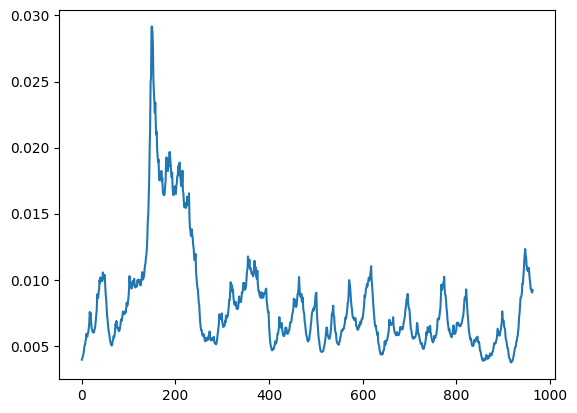

In [21]:
fig, ax = plt.subplots()
ax.plot(np.mean(fit['h'], axis=1));